# Import libraries

In [ ]:
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import os

Download data from Kaggle

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"thnhnguyenphuc","key":"c4567d6a802976fa686fb1f293c5ce5f"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

# https://technowhisp.com/kaggle-api-python-documentation/
# Authenticate to Kaggle
api = KaggleApi()
api.authenticate()

# Download the dataset
api.dataset_download_files('duyminhnguyentran/csc15105', unzip=True)

Path to data file (change if necessary)

In [ ]:
file_path = "Project1_Data.json"

# Perform EDA on data

In [ ]:
with open(file_path, "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

df.head()

,id,question,title,text,label
0,u7-1570446247_1,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,u7-1570446247_2,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,u7-1570446247_0,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,u7-1570446247_3,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,u7-1570445661_0,Mỗi hiệp bóng đá kéo dài bao lâu,Bóng đá,Một trận đấu bóng đá thông thường có hai hiệp ...,True


In [ ]:
print("\nBasic statistics of the DataFrame:")
df.describe()


Basic statistics of the DataFrame:


,id,question,title,text,label
count,18108,18108,18108,18108,18108
unique,18107,5070,9457,15957,2
top,u8-1560855262_1,Quê hương của tổng thống Obama ở đâu,,"Phú Quốc , còn được mệnh danh là Đảo Ngọc , là...",False
freq,2,22,995,10,12370


In [ ]:
print("\nMissing values:")
df.isnull().sum()


Missing values:


id          0
question    0
title       0
text        0
label       0
dtype: int64

# Word cloud

Text

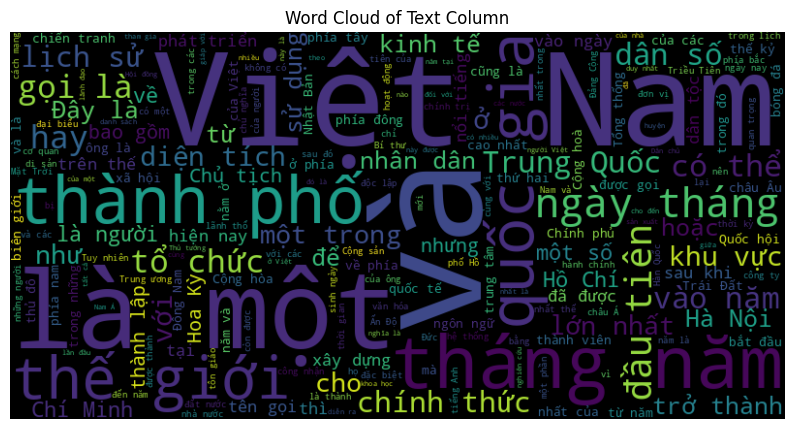

In [ ]:
text = " ".join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Column')
plt.show()

Question

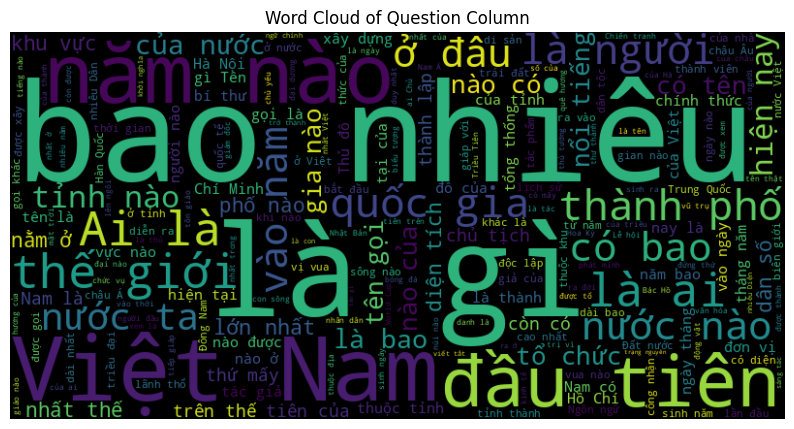

In [ ]:
text = " ".join(df['question'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Question Column')
plt.show()

# Lable ratio

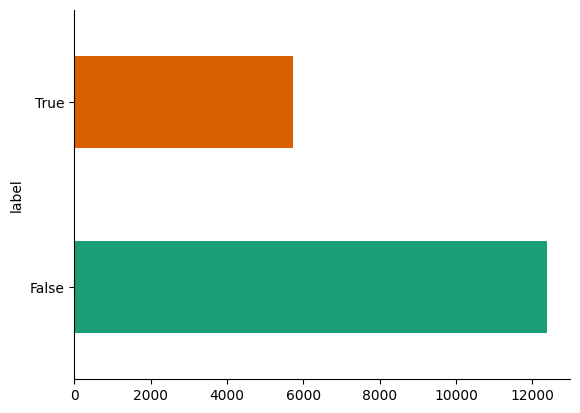

In [ ]:
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


# Length of question and text

In [ ]:
df['question_length'] = df['question'].apply(len)

print("\nStatistics of Question Length:")
df['question_length'].describe()



Statistics of Question Length:


count    18108.000000
mean        43.131986
std         14.063813
min          7.000000
25%         34.000000
50%         42.000000
75%         51.000000
max        152.000000
Name: question_length, dtype: float64

In [ ]:
df['text_length'] = df['text'].apply(len)

print("\nStatistics of Text Length:")
df['text_length'].describe()


Statistics of Text Length:


count    18108.000000
mean       279.300917
std        191.931589
min          4.000000
25%        150.000000
50%        244.000000
75%        349.000000
max       2609.000000
Name: text_length, dtype: float64